# Outlier removal using standard deviation and z score

In [30]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [31]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [32]:
df.shape

(13200, 7)

In [33]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Aslo plot histogram to see how is the data distribution

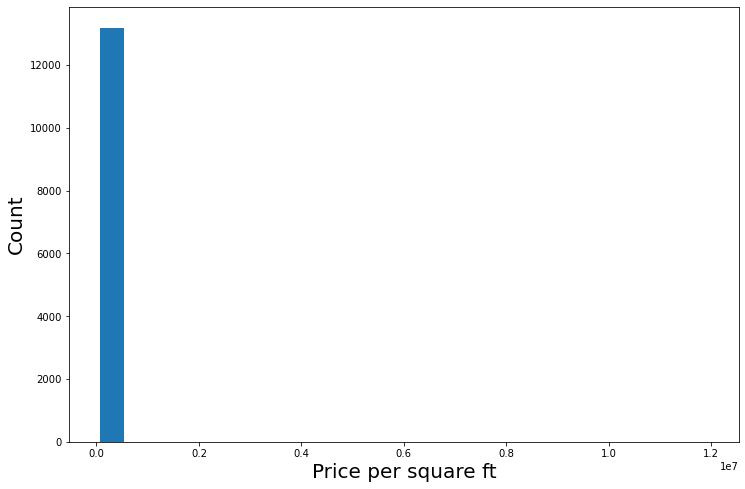

In [34]:
plt.hist(df.price_per_sqft,bins=20,rwidth=.8)
plt.xlabel('Price per square ft',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

Using log scale can make visualization little better

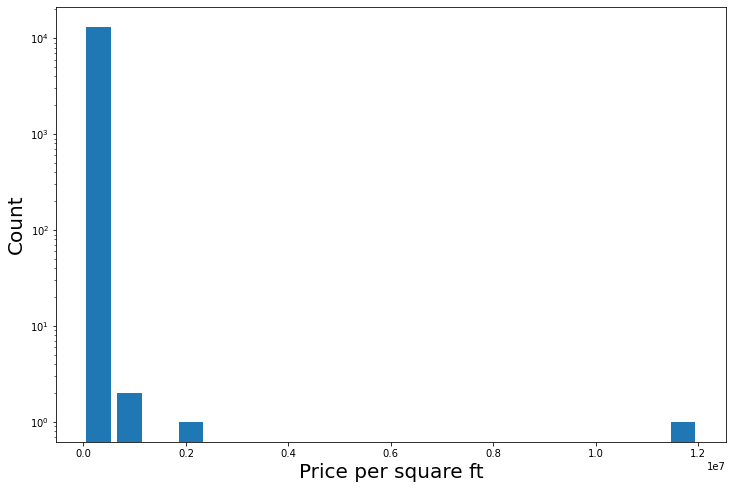

In [35]:
plt.hist(df.price_per_sqft,bins=20,rwidth=.8)
plt.xlabel('Price per square ft',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yscale('log')
plt.show()

# (1)Treat outliers using percentile first

In [36]:
lower_limit,upper_limit=df.price_per_sqft.quantile([.001,0.999])
lower_limit,upper_limit

(1366.184, 50959.36200000099)

In [37]:
outliers=df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit )]
outliers.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [38]:
df=df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df.shape

(13172, 7)

# (2) Now remove outliers using 4 standard deviation


In [39]:
max_limit = df.price_per_sqft.mean() + 4*df.price_per_sqft.std()
min_limit = df.price_per_sqft.mean() - 4*df.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [40]:
df[(df.price_per_sqft>max_limit) | (df.price_per_sqft<min_limit)].sample(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333
2410,other,6 Bedroom,2400.0,8.0,650.0,6,27083
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000
8157,other,4 BHK,2230.0,4.0,792.0,4,35515
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
8595,other,3 Bedroom,1200.0,2.0,300.0,3,25000
12678,Chikkalasandra,5 Bedroom,1000.0,4.0,300.0,5,30000


In [41]:
df = df[(df.price_per_sqft>min_limit) & (df.price_per_sqft<max_limit)]
df.shape

(13047, 7)

In this step we removed total 125 outliers:

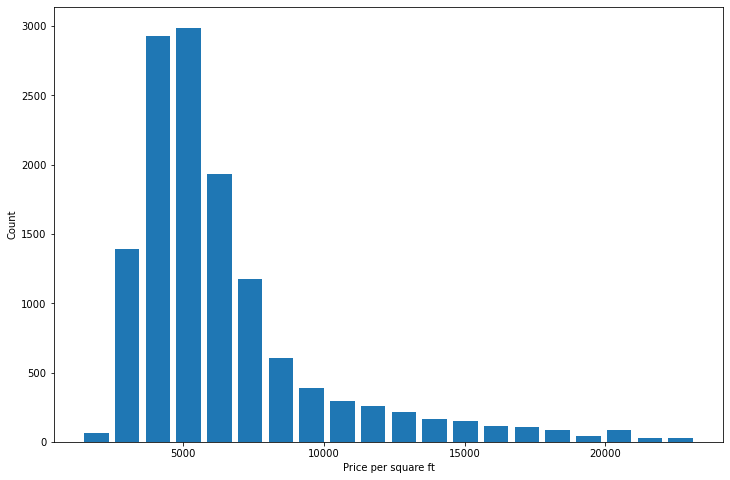

In [42]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

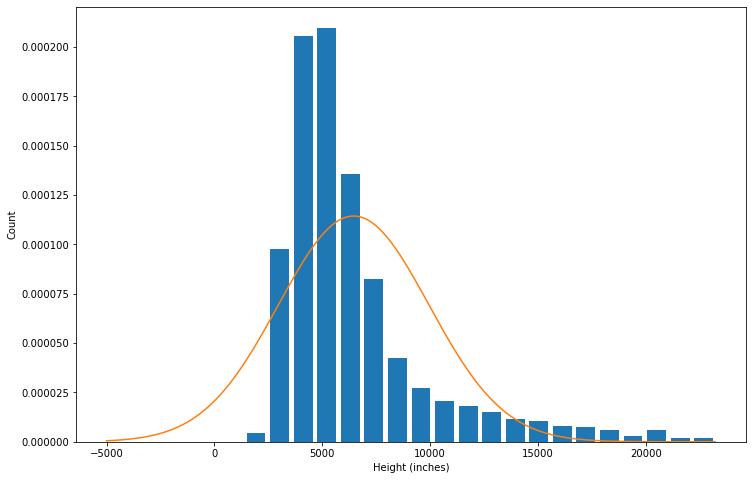

In [43]:
from scipy.stats import norm
import numpy as np

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df.price_per_sqft.mean(),df.price_per_sqft.std()))


# (3)Now remove outliers using z score.Use z score of 4 as your thresold

In [44]:
df['zscore'] = (df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()


In [45]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601


In [46]:
outliers_z = df[(df.zscore < -4) | (df.zscore>4)]
outliers_z.shape


(86, 8)

In [47]:
outliers_z.sample(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6963,other,2 BHK,1150.0,2.0,250.0,2,21739,4.383922
9541,8th Phase JP Nagar,6 Bedroom,1200.0,6.0,260.0,6,21666,4.362991
10739,other,6 Bedroom,1200.0,5.0,260.0,6,21666,4.362991
2090,Haralur Road,4 Bedroom,1200.0,4.0,245.0,4,20416,4.004585
9281,Kodihalli,4 BHK,3626.0,5.0,785.0,4,21649,4.358116


In [48]:
df = df[(df.zscore>-4)&(df.zscore<4)]


In [49]:
df.shape

(12961, 8)

In this step also we removed 125 outliers. the result would be exactly same same as 4 standard deviation